In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import requests
import gmaps
import os
# from api_keys import g_key

file_to_load = "../airbnb/AirBnB 2019/calendar_2019.csv"
list_to_load = "../airbnb/AirBnB 2019/listings_2019.csv"

cal_2019 = pd.read_csv(file_to_load)
list_2019 = pd.read_csv(list_to_load, low_memory = False)
list_2019_price = list_2019[['id','price']]
list_2019_price = list_2019_price.rename(columns = {'id':'listing_id'})

In [4]:
sum_list_2019 = list_2019[['id','name','host_response_time','host_response_rate','host_is_superhost', 'smart_location',
                       'street','neighborhood','city','suburb','state','zipcode',
                       'country','latitude','longitude','property_type','room_type',
                       'accommodates','bathrooms','bedrooms','beds', 'amenities','price',
                       'security_deposit', 'cleaning_fee', 'has_availability',
                       'availability_365', 'number_of_reviews','review_scores_rating',
                       'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication',
                       'review_scores_location', 'review_scores_value','reviews_per_month']]
neighborhood_count = pd.DataFrame(sum_list_2019['city'].value_counts())

## Which neighbourhoods have the most individual listings?

## How has this changed between datasets

## Which neighbourhoods are the most expensive?

## What price variance do we see in a suburb and why?

## How many hosts have multiple listings? What is the most listings of a host?

In [51]:
file_to_load = "../airbnb/AirBnB 2020/listings_2020.csv"
list_2020 = pd.read_csv(file_to_load)

list_2020 = list_2020[['id','name','host_response_time','host_response_rate','host_is_superhost',
                       'neighbourhood_cleansed',
                       'latitude','longitude','property_type','room_type',
                       'accommodates','bathrooms','bathrooms_text', 'bedrooms','beds', 'amenities','price', 'has_availability',
                       'availability_365', 'number_of_reviews','review_scores_rating',
                       'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication',
                       'review_scores_location', 'review_scores_value','reviews_per_month']]
neighborhood_count20 = pd.DataFrame(list_2020['neighbourhood_cleansed'].value_counts())
neighborhood_count20 = pd.merge(neighborhood_count, neighborhood_count20, left_index = True, right_index = True, how = 'outer')
neighborhood_count20 = neighborhood_count20.sort_values(by = 'city', ascending = False)
neighborhood_count20 = neighborhood_count20.rename(columns = {'city': '2019 Listings', 'neighbourhood_cleansed': '2020 Listings'})
neighborhood_count20['Change in Listings'] = neighborhood_count20['2020 Listings'] - neighborhood_count20['2019 Listings']
neighborhood_count20.head()

,2019 Listings,2020 Listings,Change in Listings
Melbourne,7368,6174,-1194
Port Phillip,2808,2498,-310
Yarra,2049,1578,-471
Stonnington,1621,1369,-252
Moreland,967,863,-104


Text(0, 0.5, 'Listings')

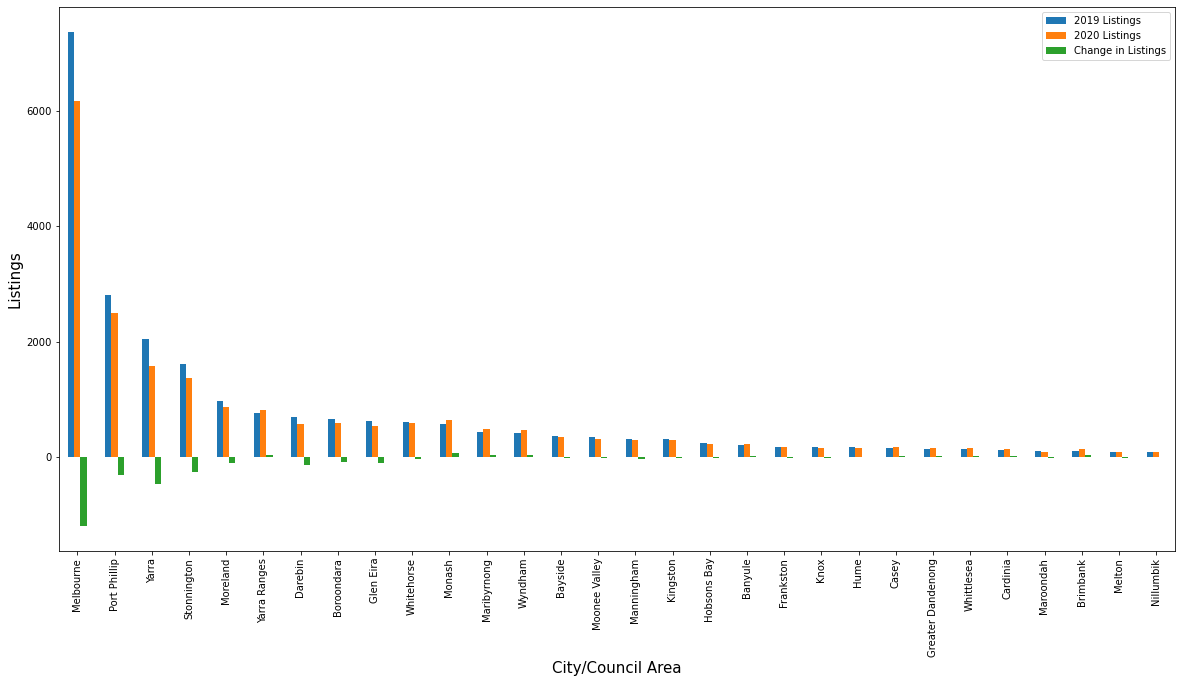

In [6]:
neighborhood_count20.plot(kind = 'bar', y = ['2019 Listings', '2020 Listings', 'Change in Listings'], align = 'center', figsize = (20,10))
plt.xlabel('City/Council Area', fontsize = 15)
plt.ylabel('Listings', fontsize = 15)

# Create below this, dataframe with room type count for each year, then map to bar chart as above showing any differences between 2019 and 2020

# Comparing Days Booked Across Cities

## Of interest here is that Moreland is the highest average days booked across all council areas in 2019.

In [7]:
list_2019 = sum_list_2019
list_2019['Booked_2019'] = 365 - list_2019['availability_365']
neighborhood_book2019 = list_2019.groupby('city').mean()
total_days = pd.DataFrame(neighborhood_book2019['Booked_2019'])
neighborhood_book2019 = list_2019.groupby('city').median()
total_days['Median Booked 2019'] = neighborhood_book2019['Booked_2019']


list_2020 = list_2020
list_2020['Booked_2020'] = 365 - list_2020['availability_365']
neighborhood_book20 = list_2020.groupby('neighbourhood_cleansed').mean()
total_days20 = pd.DataFrame(neighborhood_book20['Booked_2020'])
neighborhood_book20 = list_2020.groupby('neighbourhood_cleansed').median()
total_days20['Median Booked 2020'] = neighborhood_book20['Booked_2020']
total_days = pd.merge(total_days, total_days20, left_index = True, right_index = True, how = 'outer')
total_days = total_days.sort_values(by = 'Booked_2019', ascending = False)
total_days.head()

,Booked_2019,Median Booked 2019,Booked_2020,Median Booked 2020
city,,,,
Moreland,265.514995,320.0,252.209733,287.0
Yarra,265.232796,327.0,253.365019,341.0
Darebin,259.992837,323.0,256.111111,333.0
Melbourne,242.376629,289.0,231.425656,275.0
Stonnington,239.495373,294.0,235.598977,278.0


# Create dataframe which analyses the pricing of id's, then plot room types and prices

# Heatmap of locations in 2019 for nightly price

In [8]:
# gmaps.configure(api_key=g_key)
# fig2019 = gmaps.figure()
# coord2019 = list_2019[['latitude','longitude']]
# price = list_2019['price']
# heat_layer = gmaps.heatmap_layer(coord2019, weights = price, dissipating = False, max_intensity = max(price), point_radius=0.01)
# fig2019.add_layer(heat_layer)
# fig2019

# Heatmap of locations in 2020 for nightly price

## Use Sherin's code to remove the dollar sign from the price per night column

list_2020['price'] = list_2020['price'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
# gmaps.configure(api_key=g_key)
# fig2020 = gmaps.figure()
# coord2020 = list_2020[['latitude','longitude']]
# list_2020['price'] = list_2020['price'].replace('[\$,]', '', regex=True).astype(float)
# price = list_2020['price']
# heat_layer = gmaps.heatmap_layer(coord2020, weights = price, dissipating = False, max_intensity = max(price), point_radius=0.01)
# fig2020.add_layer(heat_layer)
# fig2020

In [11]:
file_to_load = "../airbnb/AirBnB 2020/calendar_2020.csv"
cal_2020 = pd.read_csv(file_to_load)

cal_2020['date'] = pd.to_datetime(cal_2020['date'])
cal_2020['day'] = cal_2020['date'].dt.day
cal_2020['month'] = cal_2020['date'].dt.month
cal_2020['year'] = cal_2020['date'].dt.year

month_2020 = cal_2020.groupby(['year','month']).count()

In [13]:
# file_to_load = "../airbnb/AirBnB 2021/calendar_2021.csv"
# cal_2021 = pd.read_csv(file_to_load)

# cal_2021['date'] = pd.to_datetime(cal_2021['date'])
# cal_2021['day'] = cal_2021['date'].dt.day
# cal_2021['month'] = cal_2021['date'].dt.month
# cal_2021['year'] = cal_2021['date'].dt.year

# month_2021 = cal_2021.groupby(['year','month']).count()

In [14]:
days_cost = pd.merge(cal_2019, list_2019_price, on = 'listing_id', how = 'left')
daily_price_2019 = days_cost.groupby('listing_id').mean()
daily_price_2019.describe()

,price_y
count,22895.000000
mean,148.004368
std,210.883253
min,0.000000
25%,71.000000
50%,111.000000
75%,165.000000
max,12624.000000


In [16]:
#Finding all available booking ID's and total days available
avail_2019 = cal_2019.loc[cal_2019['available'] == 't']
avail_2019 = avail_2019.groupby('listing_id').count()
avail_2019 = pd.merge(avail_2019, list_2019_price, on = 'listing_id', how = 'left')
avail_2019 = avail_2019.rename(columns = {'available':'Number of Days Available',
                                          'price_y': 'Price per Night'})
avail_2019 = avail_2019[['listing_id','Number of Days Available','Price per Night']]
avail_2019

,listing_id,Number of Days Available,Price per Night
0,9835,365,60
1,10803,213,35
2,12936,326,159
3,16760,328,69
4,38271,328,98
...,...,...,...
17392,30592332,82,55
17393,30592345,365,129
17394,30592362,15,53
17395,30592590,349,130


In [17]:
#Finding all booked listing_id's and number of days booked
booked_2019 = cal_2019.loc[cal_2019['available'] == 'f']
booked_2019 = booked_2019.groupby('listing_id').count()
booked_2019 = pd.merge(booked_2019, list_2019_price, on = 'listing_id', how = 'left')
booked_2019 = booked_2019.rename(columns = {'available':'Number of Days Booked',
                                          'price_y': 'Price per Night'})
booked_2019 = booked_2019[['listing_id','Number of Days Booked','Price per Night']]
booked_2019

,listing_id,Number of Days Booked,Price per Night
0,10803,152,35
1,12936,39,159
2,15246,365,50
3,16760,37,69
4,38271,37,98
...,...,...,...
22326,30592128,336,30
22327,30592332,283,55
22328,30592362,350,53
22329,30592590,16,130


In [18]:
cal_group = days_cost.groupby(['listing_id','available']).count()

cal_group

date  price_x  price_y
listing_id available                        
9835       t           365      365      365
10803      f           152        0      152
           t           213      213      213
12936      f            39        0       39
           t           326      326      326
...                    ...      ...      ...
30592362   t            15       15       15
30592590   f            16        0       16
           t           349      349      349
30593623   f           297        0      297
           t            68       68       68

[39728 rows x 3 columns]

In [19]:
cal_2019['date'] = pd.to_datetime(cal_2019['date'])
cal_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8356675 entries, 0 to 8356674
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 255.0+ MB


In [20]:
cal_2019['day'] = cal_2019['date'].dt.day
cal_2019['month'] = cal_2019['date'].dt.month
cal_2019['year'] = cal_2019['date'].dt.year

In [21]:
month_2019 = cal_2019.groupby(['year','month']).count()
month_2019

listing_id    date  available   price     day
year month                                               
2018 12         572360  572360     572360  186899  572360
2019 1          709745  709745     709745  312593  709745
     2          641060  641060     641060  323736  641060
     3          709745  709745     709745  307871  709745
     4          686850  686850     686850  295074  686850
     5          709745  709745     709745  315288  709745
     6          686850  686850     686850  231450  686850
     7          709745  709745     709745  226422  709745
     8          709745  709745     709745  227130  709745
     9          686850  686850     686850  207415  686850
     10         709745  709745     709745  213627  709745
     11         686850  686850     686850  205241  686850
     12         137385  137385     137385   41446  137385

### Neena

### Plotting number of room types between 2019 vs 2020

In [175]:
# grouping by room type to get the count of number of room types in 2019
room_group2019_count = sum_list_2019.groupby('room_type')
room_group2019_count = room_group2019_count['id'].count().reset_index()

hotel_row_2019 = {'room_type':'Hotel Room', 'id':0}

room_group2019_count = room_group2019_count.append(hotel_row_2019, ignore_index=True)
room_group2019_count = room_group2019_count.sort_values('room_type')
room_group2019_count

,room_type,id
0,Entire home/apt,14379
3,Hotel Room,0
1,Private room,8116
2,Shared room,400


In [176]:
# grouping by room type to get the count of number of room types in 2020
room_group2020_count = list_2020.groupby('room_type')
room_group2020_count = room_group2020_count['id'].count().reset_index()

room_group2020_count = room_group2020_count.sort_values('room_type')
room_group2020_count

,room_type,id
0,Entire home/apt,12613
1,Hotel room,227
2,Private room,7161
3,Shared room,419


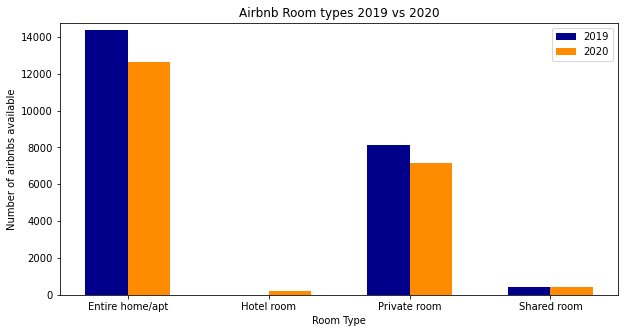

In [177]:
# Plotting the room types for 2019 vs 2020

# Numbers of pairs of bars
N = 4

# Position of bars on x-axis
position = np.arange(N)

plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(position, room_group2019_count['id'] , width, label='2019', color='darkblue')
plt.bar(position + width, room_group2020_count['id'], width, label='2020', color='darkorange')

plt.xlabel('Room Type')
plt.ylabel('Number of airbnbs available')
plt.title('Airbnb Room types 2019 vs 2020')

plt.xticks(position + width / 2, room_group2020_count['room_type'])
plt.ylim(0, 14750)

plt.legend(loc='best')
plt.savefig('Output_files_Neena/Roomtypes.png')
plt.show()


### Plotting Price of room type in suburbs for 2019 vs 2020

In [178]:
# Room Type and Price - 2019
# groupby city and room_type to get median price
room_city_group2019 = sum_list_2019.groupby(['city', 'room_type'])['price'].median().reset_index()
room_city_group2019

,city,room_type,price
0,Banyule,Entire home/apt,120.0
1,Banyule,Private room,53.0
2,Banyule,Shared room,50.0
3,Bayside,Entire home/apt,199.0
4,Bayside,Private room,71.0
...,...,...,...
83,Yarra,Private room,65.0
84,Yarra,Shared room,29.0
85,Yarra Ranges,Entire home/apt,220.0
86,Yarra Ranges,Private room,117.0


In [179]:
# Room Type and Price - 2020
# groupby neighbourhood cleansed and room_type to get median price
list_2020['price'] = list_2020['price'].replace('[$,]', '', regex=True).astype(float)
room_city_group2020 = list_2020.groupby(['neighbourhood_cleansed', 'room_type'])['price'].median().reset_index()
room_city_group2020

,neighbourhood_cleansed,room_type,price
0,Banyule,Entire home/apt,125.0
1,Banyule,Private room,45.0
2,Banyule,Shared room,50.0
3,Bayside,Entire home/apt,220.0
4,Bayside,Hotel room,195.0
...,...,...,...
97,Yarra,Private room,60.0
98,Yarra,Shared room,50.0
99,Yarra Ranges,Entire home/apt,224.0
100,Yarra Ranges,Hotel room,270.0


In [203]:
# Select only entire home/apt - 2019
entire_group2019 = room_city_group2019.loc[room_city_group2019['room_type']=='Entire home/apt']

# Select only entire home/apt - 2020
entire_group2020 = room_city_group2020.loc[room_city_group2020['room_type']=='Entire home/apt']

In [202]:
# Select only Private room - 2019
private_group2019 = room_city_group2019.loc[room_city_group2019['room_type']=='Private room']

# Select only entire home/apt - 2020
private_group2020 = room_city_group2020.loc[room_city_group2020['room_type']=='Private room']


In [204]:
# Select only Shared room - 2019
shared_group2019 = room_city_group2019.loc[room_city_group2019['room_type']=='Shared room']

# Select only Shared room - 2020
shared_group2020 = room_city_group2020.loc[room_city_group2020['room_type']=='Shared room']

# Merging the 2 datsets to show price for shared rooms in 2019 vs 2020 because lengths are different
shared_merge = pd.merge(shared_group2019, shared_group2020, left_on='city', right_on='neighbourhood_cleansed',
                       suffixes=('_2019', '_2020'), how='outer')
shared_merge = shared_merge[['city', 'room_type_2019', 'price_2019', 'price_2020']].fillna(0)
shared_merge

,city,room_type_2019,price_2019,price_2020
0,Banyule,Shared room,50.0,50.0
1,Bayside,Shared room,60.0,82.5
2,Boroondara,Shared room,49.5,78.0
3,Cardinia,Shared room,40.0,150.0
4,Casey,Shared room,60.0,0.0
5,Darebin,Shared room,21.0,40.0
6,Frankston,Shared room,26.0,27.0
7,Glen Eira,Shared room,25.0,31.0
8,Greater Dandenong,Shared room,30.0,30.0
9,Hobsons Bay,Shared room,80.0,80.0


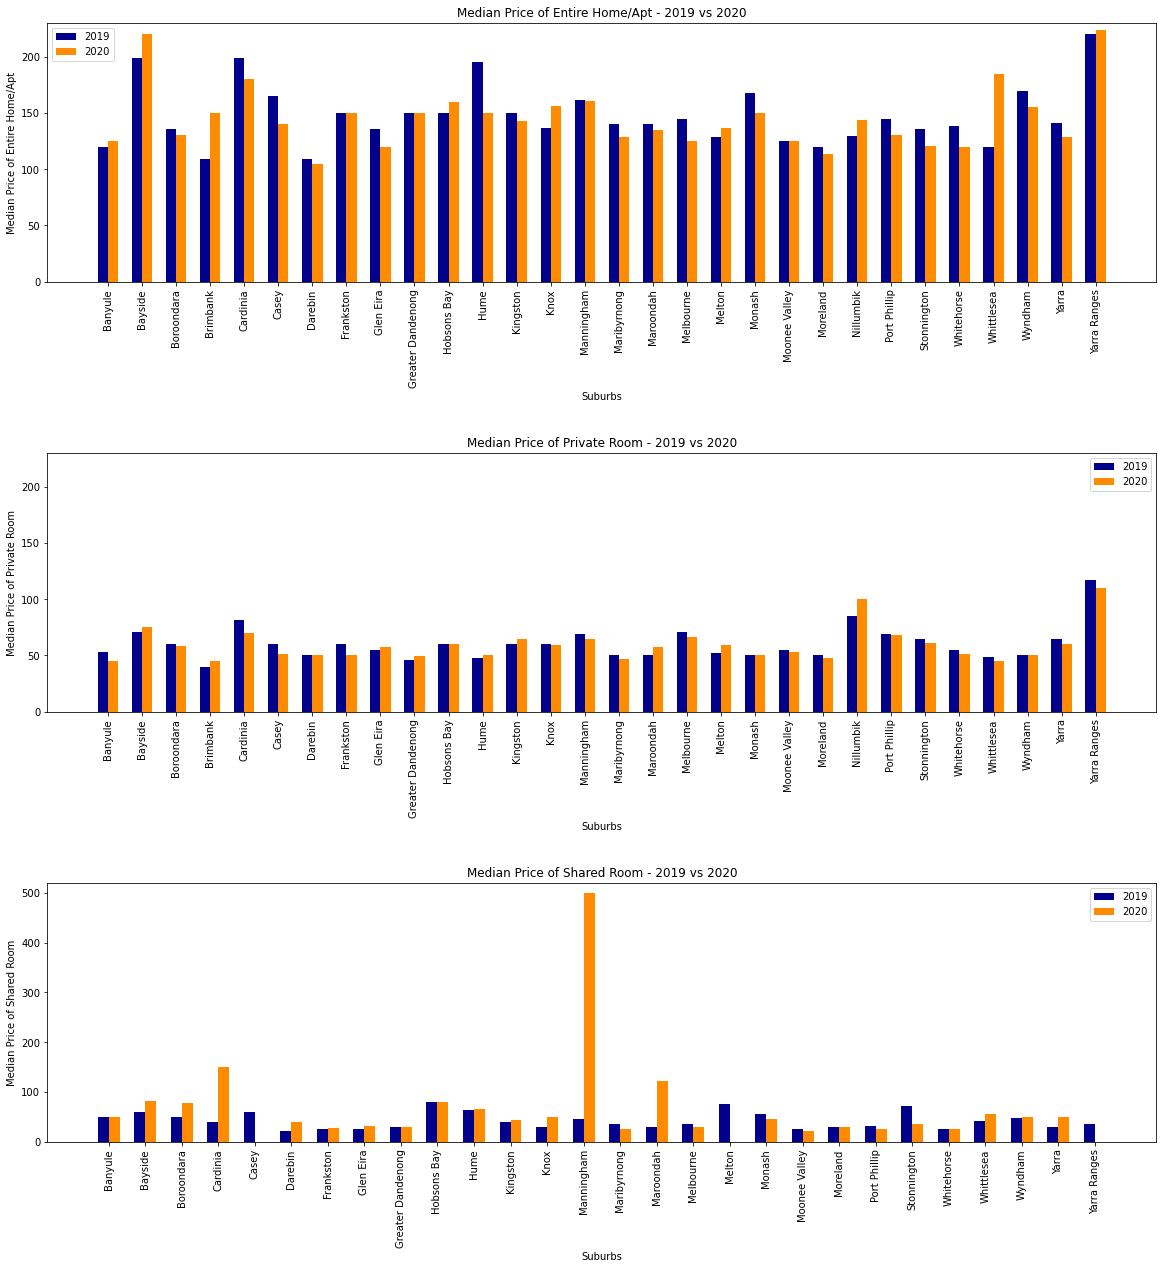

In [192]:
# Plotting price for each type of room type for 2019 vs 2020
# Numbers of pairs of bars for Entire Home and Private Rooms
N = 30

# Position of bars on x-axis for Entire Home and Private Rooms
position = np.arange(N)

# Numbers of pairs of bars for Shared Rooms
N_shared = 28

# Position of bars on x-axis for shared rooms
position_shared = np.arange(N_shared)

fig, (ax1,ax2, ax3) = plt.subplots(3,1, figsize=(20,20))
fig. tight_layout(pad=15.0)
ax1.bar(position, entire_group2019['price'] , width, label='2019', color='darkblue')
ax1.bar(position + width, entire_group2020['price'], width, label='2020', color='darkorange')

ax1.set_xlabel('Suburbs')
ax1.set_ylabel('Median Price of Entire Home/Apt')
ax1.set_title('Median Price of Entire Home/Apt - 2019 vs 2020')
ax1.set_xticks(position + width / 2)
ax1.set_xticklabels(entire_group2019['city'], rotation='vertical', fontsize=10)
ax1.set_ylim(0, 230)
ax1.legend(loc='best')

ax2.bar(position, private_group2019['price'] , width, label='2019', color='darkblue')
ax2.bar(position + width, private_group2020['price'], width, label='2020', color='darkorange')
ax2.set_xlabel('Suburbs')
ax2.set_ylabel('Median Price of Private Room')
ax2.set_title('Median Price of Private Room - 2019 vs 2020')
ax2.set_xticks(position + width / 2)
ax2.set_xticklabels(entire_group2019['city'], rotation='vertical', fontsize=10)
ax2.set_ylim(0, 230)
ax2.legend(loc='best')

ax3.bar(position_shared, shared_merge['price_2019'] , width, label='2019', color='darkblue')
ax3.bar(position_shared + width, shared_merge['price_2020'], width, label='2020', color='darkorange')
ax3.set_xlabel('Suburbs')
ax3.set_ylabel('Median Price of Shared Room')
ax3.set_title('Median Price of Shared Room - 2019 vs 2020')
ax3.set_xticks(position_shared + width / 2)
ax3.set_xticklabels(shared_merge['city'], rotation='vertical', fontsize=10)
ax3.set_ylim(0, 520)
ax3.legend(loc='best')

plt.savefig('Output_files_Neena/Roomtype_price.png');


### Plotting the number of room types in suburbs for 2019 vs 2020

C:\Users\Work\anaconda3\envs\PythonData\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Work\anaconda3\envs\PythonData\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


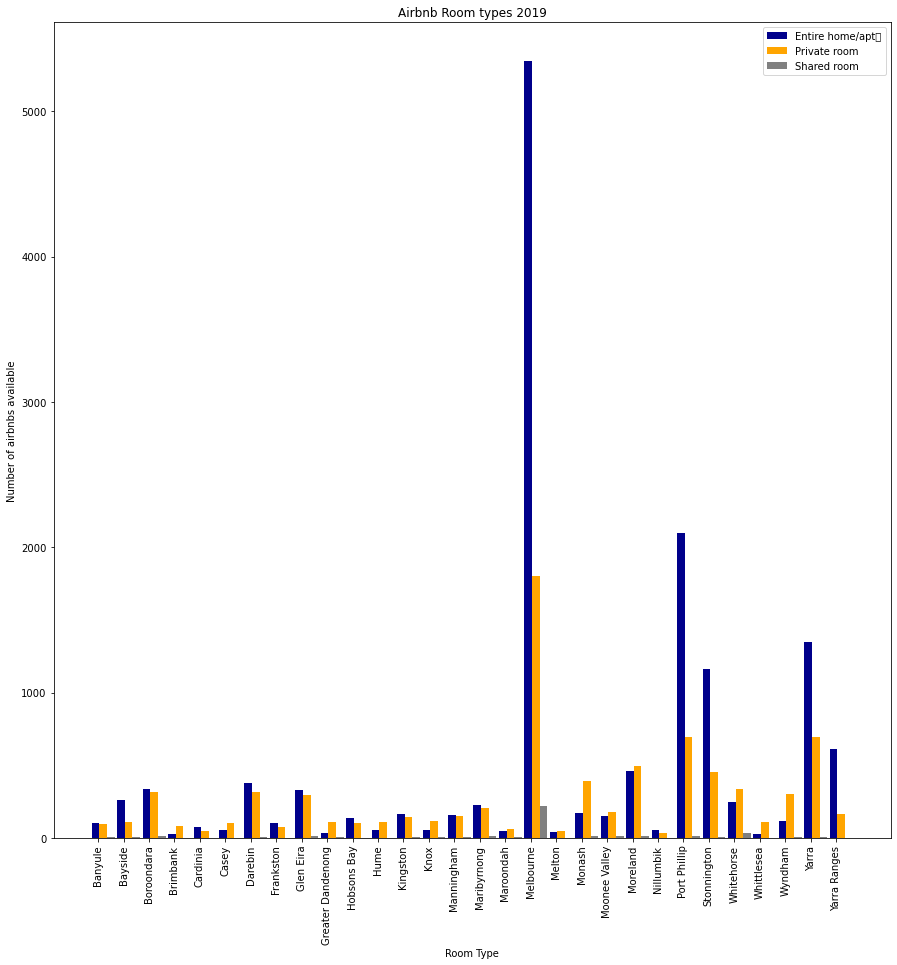

In [205]:
# Plotting Room types for 2019 for suburbs
# 2019 data grouping by city
city_group2019 = sum_list_2019.groupby('city')
city_group2019 = city_group2019['room_type'].value_counts().unstack()
city_group2019 = city_group2019.reset_index()
city_group2019

# Numbers of pairs of bars
N = 30

# Position of bars on x-axis
position = np.arange(N)

plt.figure(figsize=(15,15))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(position, city_group2019['Entire home/apt'] , width, label='Entire home/apt	', color='darkblue')
plt.bar(position + width, city_group2019['Private room'], width, label='Private room', color='orange')
plt.bar(position + width + width, city_group2019['Shared room'], width, label='Shared room', color='grey')

plt.xlabel('Room Type')
plt.ylabel('Number of airbnbs available')
plt.title('Airbnb Room types 2019')

plt.xticks(position + width / 3, city_group2019['city'], rotation = 'vertical')
# plt.ylim(0, 14750)

plt.legend(loc='best')
plt.show();


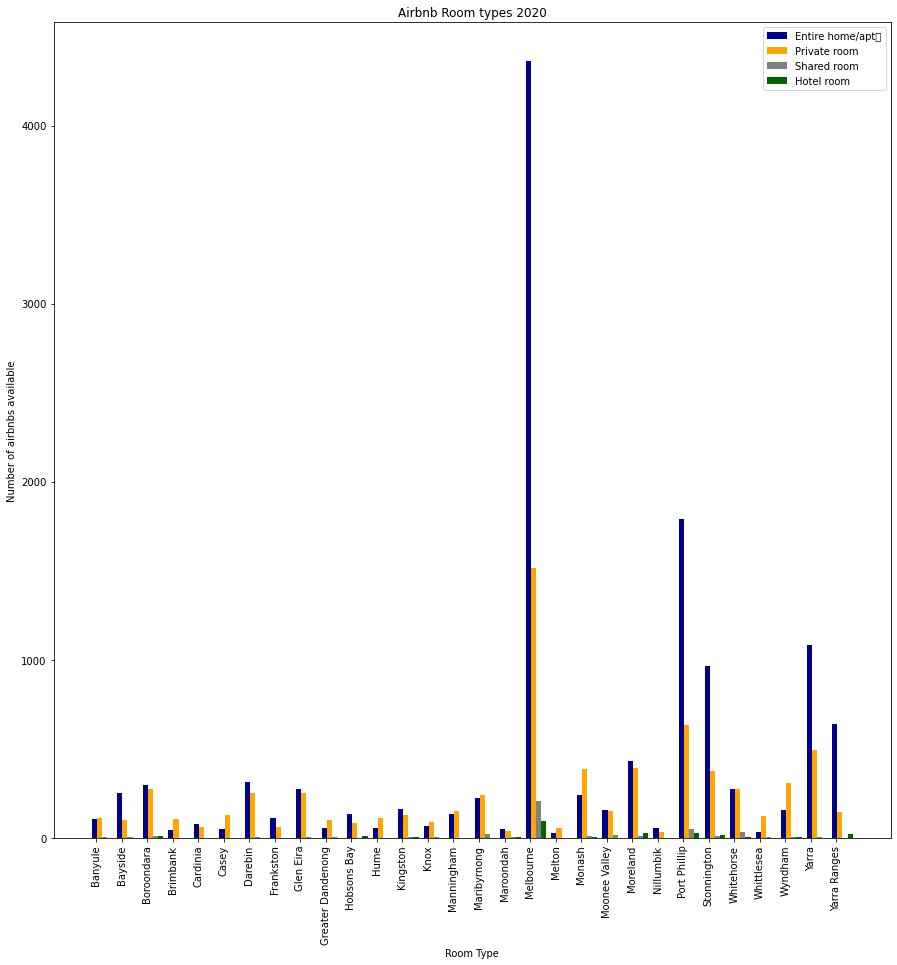

In [207]:
# Plotting number of room types in suburbs for 2020
# 2020 data grouping by city
city_group2020 = list_2020.groupby('neighbourhood_cleansed')
city_group2020 = city_group2020['room_type'].value_counts().unstack().fillna(0)
city_group2020 = city_group2020.reset_index()
city_group2020

# Numbers of pairs of bars
N = 30

# Position of bars on x-axis
position = np.arange(N)

plt.figure(figsize=(15,15))

# Width of a bar 
width = 0.2      

# Plotting
plt.bar(position, city_group2020['Entire home/apt'] , width, label='Entire home/apt	', color='darkblue')
plt.bar(position + width, city_group2020['Private room'], width, label='Private room', color='orange')
plt.bar(position + (2*width), city_group2020['Shared room'], width, label='Shared room', color='grey')
plt.bar(position + (3* width), city_group2020['Hotel room'], width, label='Hotel room', color='darkgreen')

plt.xlabel('Room Type')
plt.ylabel('Number of airbnbs available')
plt.title('Airbnb Room types 2020')

plt.xticks(position + width / 3, city_group2019['city'], rotation = 'vertical')
# plt.ylim(0, 14750)

plt.legend(loc='best')
plt.show();


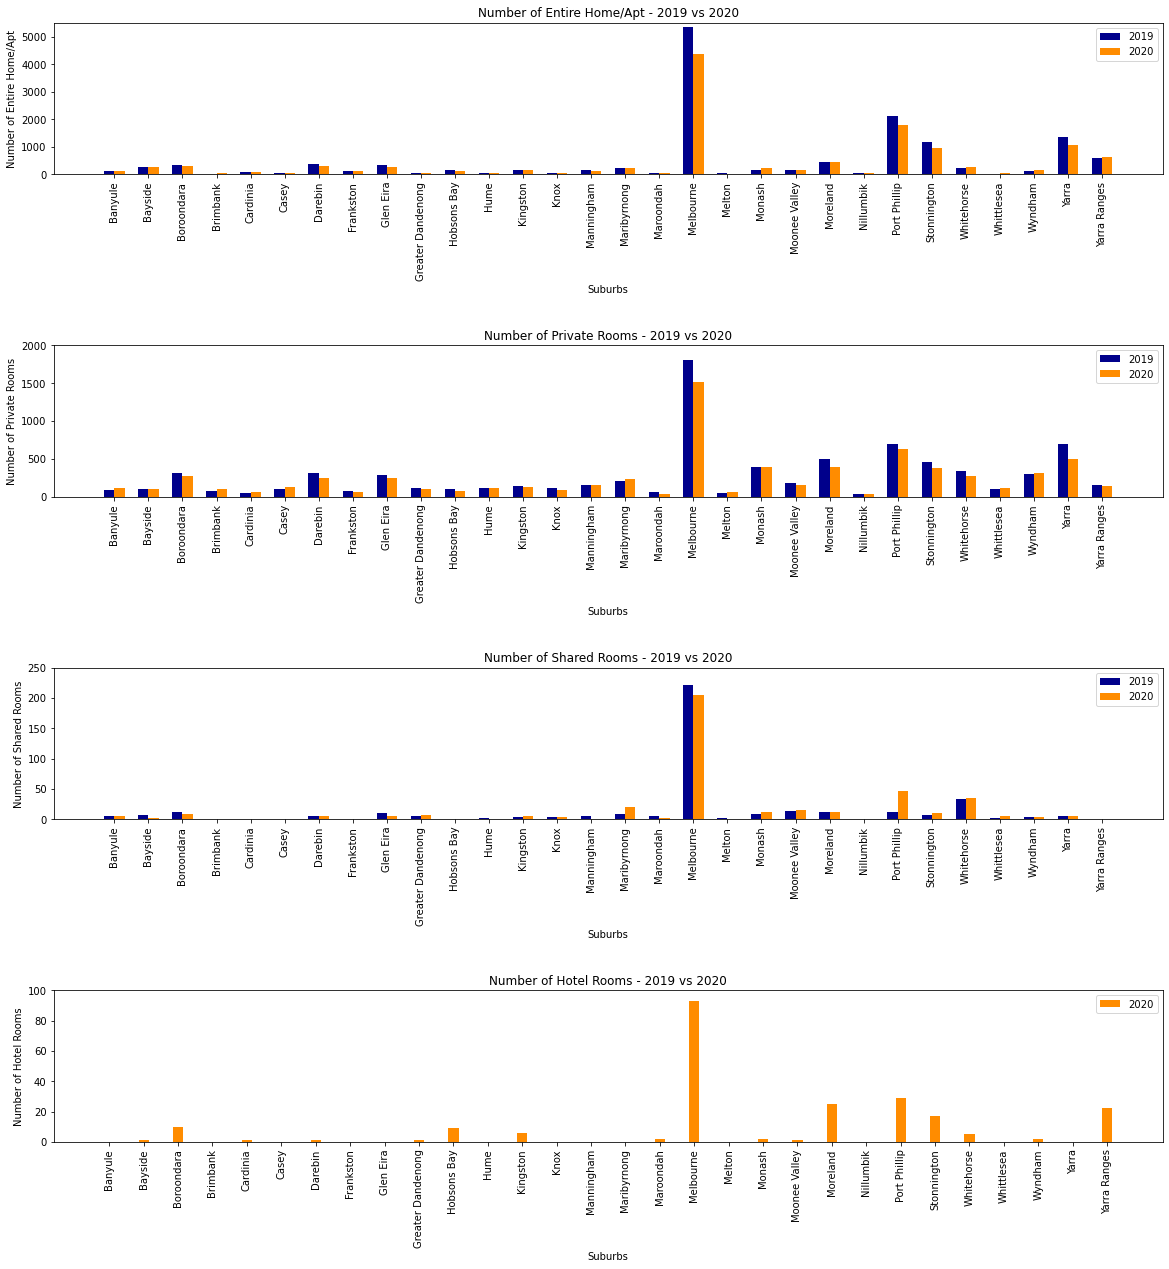

In [209]:
# Plotting number of room types in suburbs for 2020
# Numbers of pairs of bars for Suburbs
N = 30

# Position of bars on x-axis for Suburbs
position = np.arange(N)

width = 0.3

# ax1  subplot - Entire home/apt
# ax2  subplot - Private room
# ax3  subplot - Shared room
# ax1  subplot - Hotel Room
fig, (ax1,ax2, ax3, ax4 ) = plt.subplots(4,1, figsize=(20,20))
fig.tight_layout(pad=15.0)

ax1.bar(position, city_group2019['Entire home/apt'] , width, label='2019', color='darkblue')
ax1.bar(position + width, city_group2020['Entire home/apt'], width, label='2020', color='darkorange')

ax1.set_xlabel('Suburbs')
ax1.set_ylabel('Number of Entire Home/Apt')
ax1.set_title('Number of Entire Home/Apt - 2019 vs 2020')
ax1.set_xticks(position + width / 2)
ax1.set_xticklabels(city_group2019['city'], rotation='vertical', fontsize=10)
ax1.set_ylim(0, 5500)
ax1.legend(loc='best')

ax2.bar(position, city_group2019['Private room'], width, label='2019', color='darkblue')
ax2.bar(position + width, city_group2020['Private room'], width, label='2020', color='darkorange')
ax2.set_xlabel('Suburbs')
ax2.set_ylabel('Number of Private Rooms')
ax2.set_title('Number of Private Rooms - 2019 vs 2020')
ax2.set_xticks(position + width / 2)
ax2.set_xticklabels(city_group2019['city'], rotation='vertical', fontsize=10)
ax2.set_ylim(0, 2000)
ax2.legend(loc='best')

ax3.bar(position, city_group2019['Shared room'] , width, label='2019', color='darkblue')
ax3.bar(position + width, city_group2020['Shared room'], width, label='2020', color='darkorange')
ax3.set_xlabel('Suburbs')
ax3.set_ylabel('Number of Shared Rooms')
ax3.set_title('Number of Shared Rooms - 2019 vs 2020')
ax3.set_xticks(position + width / 2)
ax3.set_xticklabels(city_group2019['city'], rotation='vertical', fontsize=10)
ax3.set_ylim(0, 250)
ax3.legend(loc='best')

ax4.bar(position, city_group2020['Hotel room'], width, label='2020', color='darkorange')
ax4.set_xlabel('Suburbs')
ax4.set_ylabel('Number of Hotel Rooms')
ax4.set_title('Number of Hotel Rooms - 2019 vs 2020')
ax4.set_xticks(position)
ax4.set_xticklabels(city_group2019['city'], rotation='vertical', fontsize=10)
ax4.set_ylim(0, 100)
ax4.legend(loc='best')

plt.savefig('Output_files_Neena/roomtypes_suburb.png');

In [149]:
merge_room_df = pd.merge(city_group2019, city_group2020, left_on='city', right_on='neighbourhood_cleansed', suffixes=('_2019', '_2020'))
merge_room_df = merge_room_df[['city', 'Entire home/apt_2019', 'Private room_2019', 'Shared room_2019', 'Entire home/apt_2020',
                               'Private room_2020', 'Shared room_2020', 'Hotel room']].fillna(0)
merge_room_df_list = merge_room_df.values.tolist()

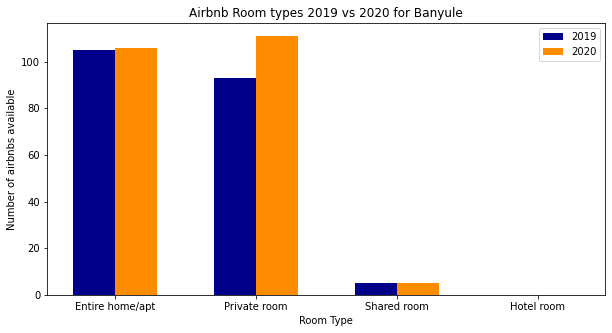

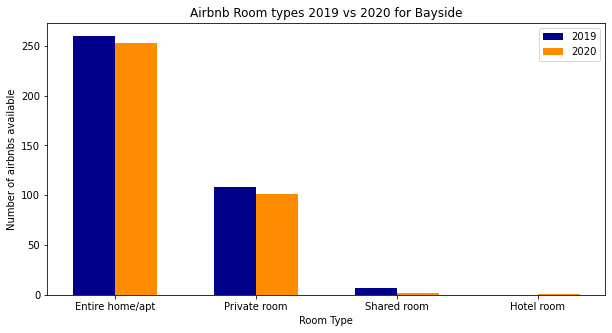

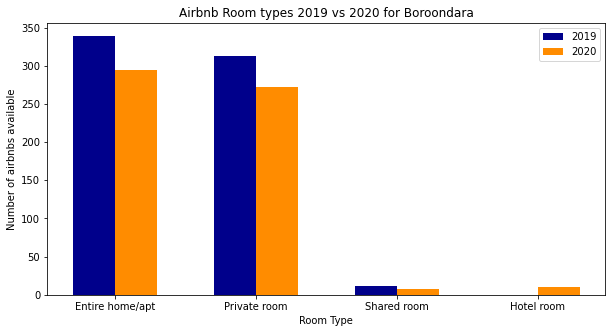

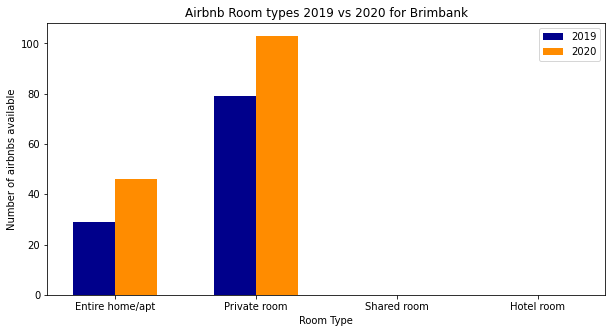

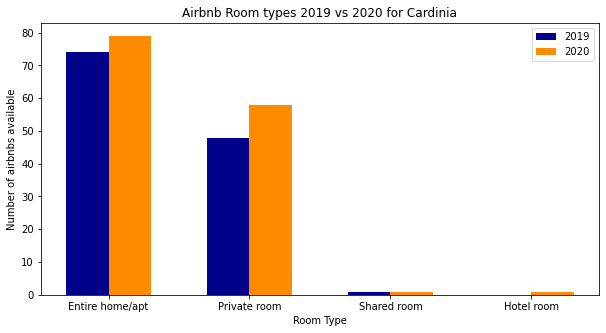

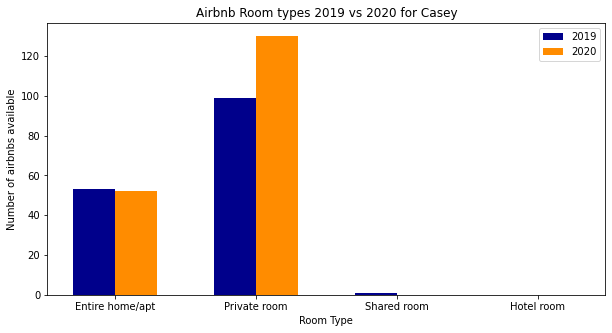

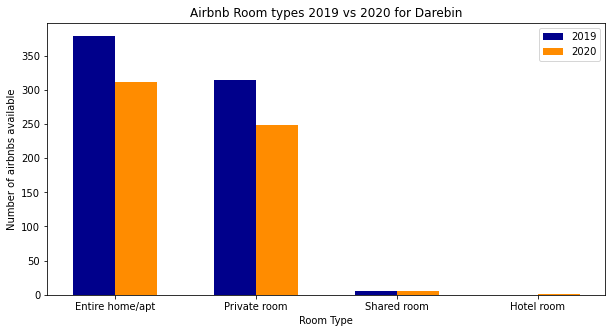

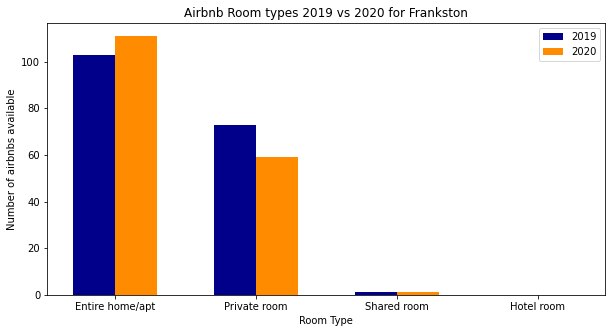

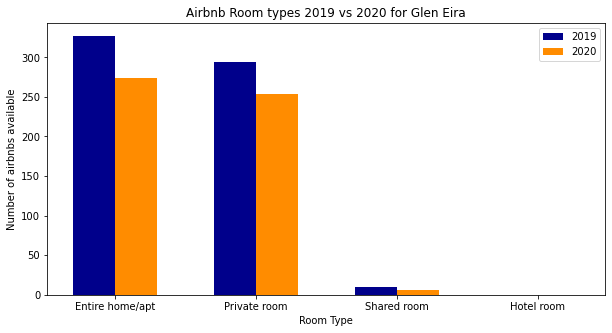

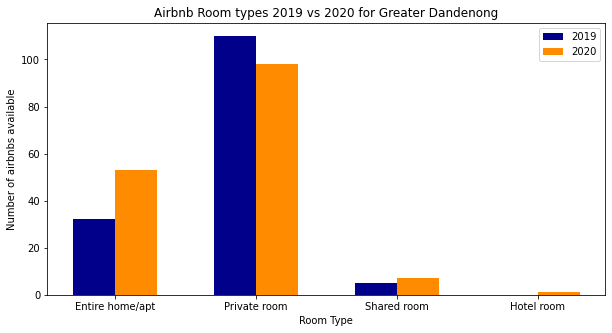

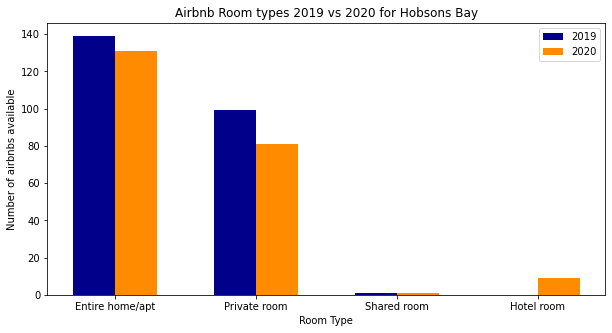

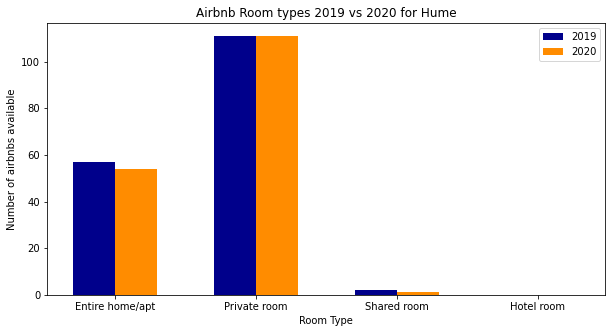

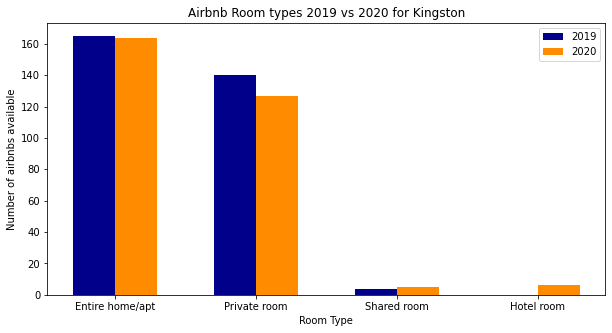

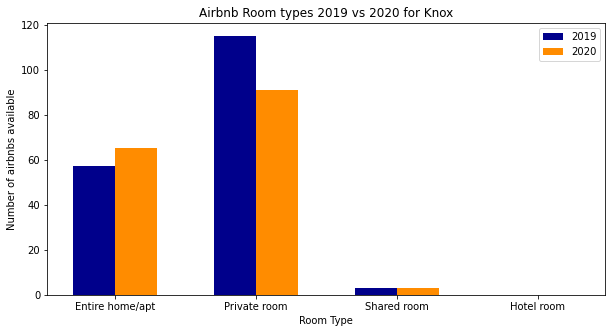

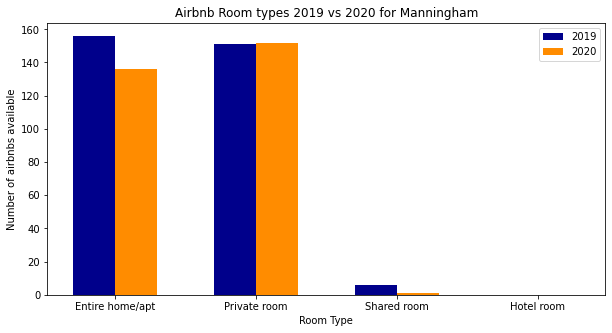

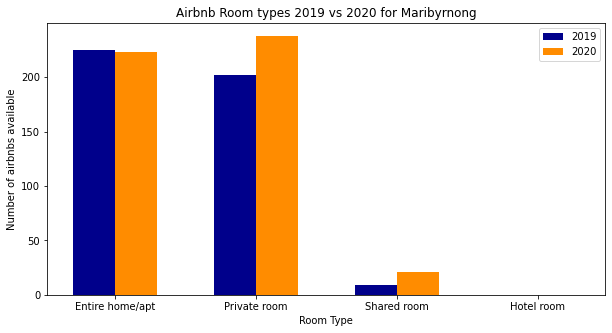

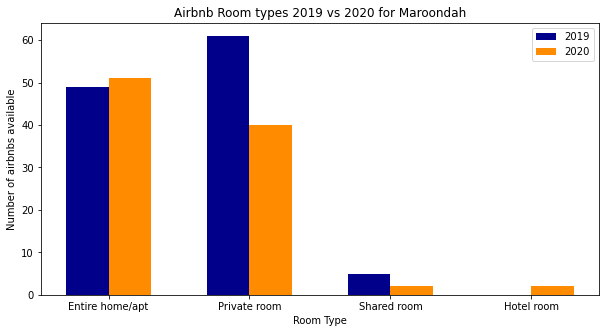

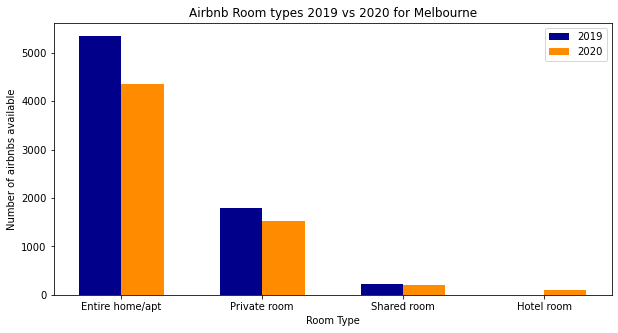

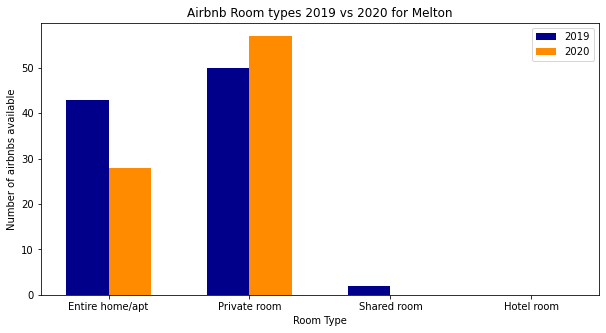

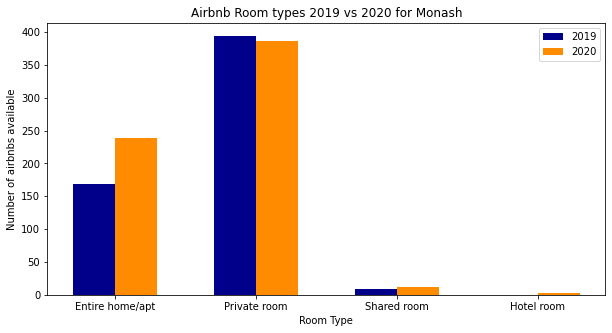

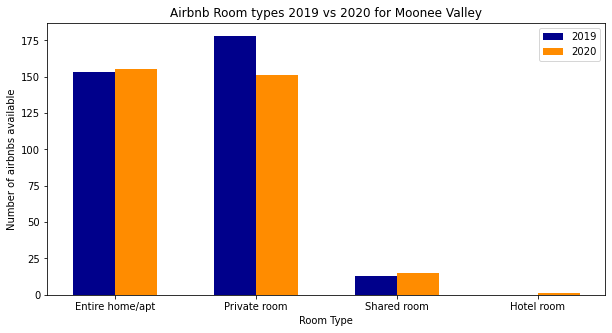

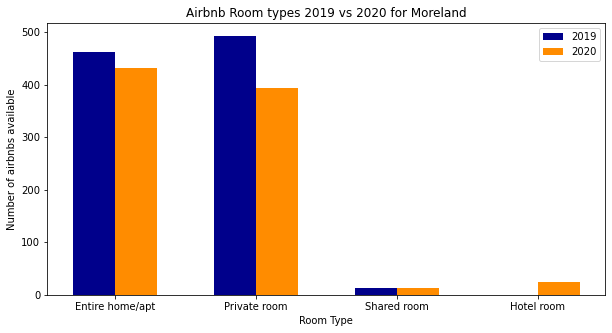

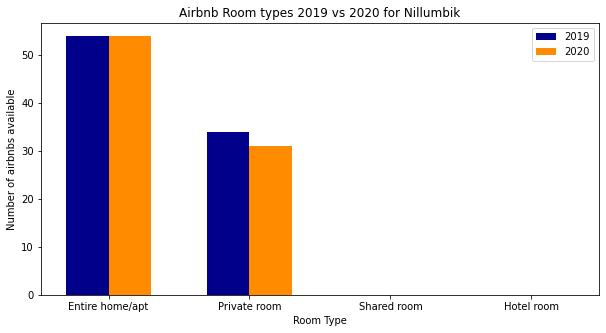

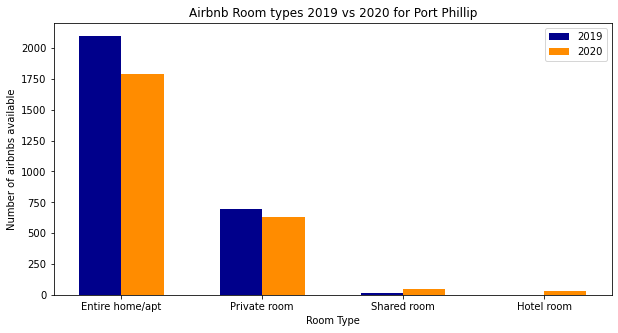

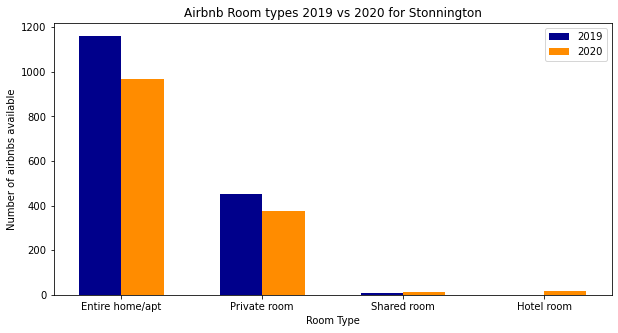

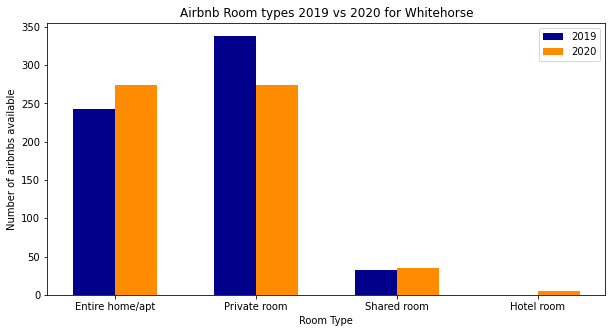

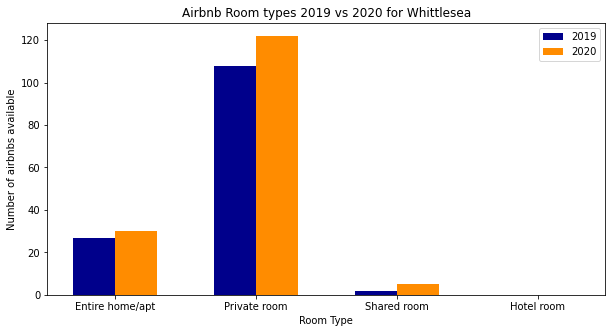

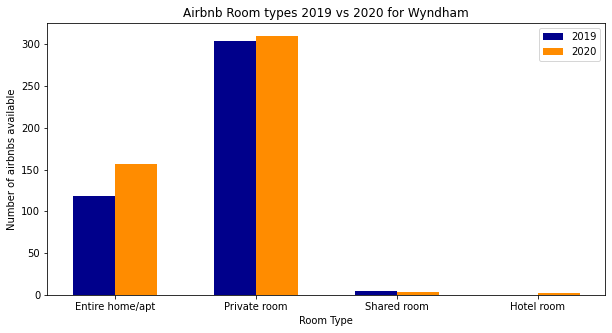

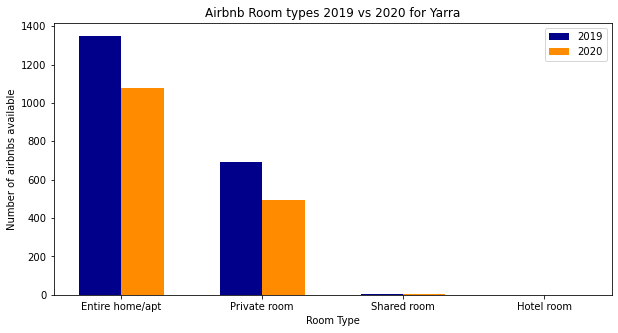

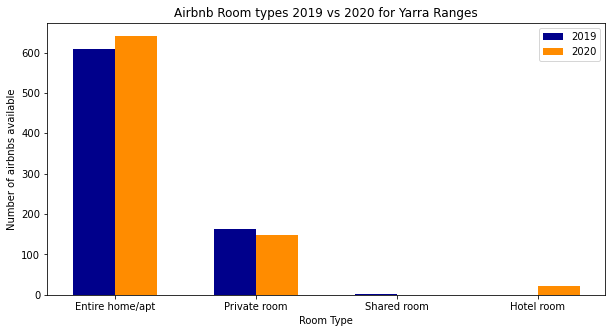

In [210]:
# Individual plots for each suburb
plt.rcParams.update({'figure.max_open_warning': 0})

xtick_value = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

for k in range(len(merge_room_df_list)):
    
    # Position of bars on x-axis
    position = np.arange(1,5,1)

    plt.figure(figsize=(10,5))

    # Width of a bar 
    width = 0.3       

    # Plotting
    plt.bar(1, merge_room_df_list[k][1] , width, label='2019', color='darkblue')
    plt.bar(1 + width, merge_room_df_list[k][4], width, label='2020', color='darkorange')
    
    plt.bar(2, merge_room_df_list[k][2] , width, color='darkblue')
    plt.bar(2 + width, merge_room_df_list[k][5], width, color='darkorange')
    
    plt.bar(3, merge_room_df_list[k][3] , width, color='darkblue')
    plt.bar(3 + width, merge_room_df_list[k][6], width, color='darkorange')
    
    plt.bar(4, 0 , width, color='darkblue')
    plt.bar(4 + width, merge_room_df_list[k][7], width, color='darkorange')

    plt.xlabel('Room Type')
    plt.ylabel('Number of airbnbs available')
    plt.title(f'Airbnb Room types 2019 vs 2020 for {merge_room_df_list[k][0]}')

    plt.xticks(position + (width/2), xtick_value)

    plt.legend(loc='best')
    plt.show()

### Correlation of number of amenities on reviews and price

In [30]:
# Counting number of amenities for listings in 2019 and checking if there is a correlation to reviews or price
amenities_2019df = sum_list_2019[['id', 'amenities', 'review_scores_rating', 'price']].fillna(0)

count_amenities_2019 = []

# Counting the number of amenities 
for x in range(len(amenities_2019df)):
    tags = amenities_2019df['amenities'][x].split(',')
    number = len(tags)
    count_amenities_2019.append(number) 

amenities_2019df_new = pd.DataFrame({'id': amenities_2019df['id'], 'Amenities': amenities_2019df['amenities'], 'Count of Amenities':
                               count_amenities_2019, 'Reviews': amenities_2019df['review_scores_rating'], 'Price': amenities_2019df['price']})
amenities_2019df_new

,id,Amenities,Count of Amenities,Reviews,Price
0,9835,"{Internet,Wifi,""Pets live on this property"",Do...",4,90.0,60
1,10803,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",32,87.0,35
2,12936,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",37,94.0,159
3,15246,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",18,94.0,50
4,16760,"{Internet,Wifi,Heating,Washer,""Smoke detector""...",9,90.0,69
...,...,...,...,...,...
22890,30592332,"{Wifi,Kitchen,Elevator,Washer,Essentials,Shamp...",7,0.0,55
22891,30592345,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",11,0.0,129
22892,30592362,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",20,0.0,53
22893,30592590,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",49,0.0,130


1.1463510423759267 41.99105112317355 0.3339919030102666 0.0 0.021381919448353933


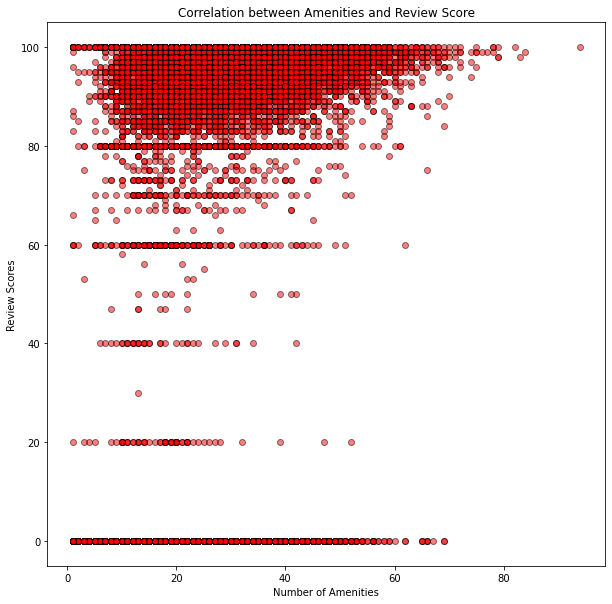

In [215]:
# Plotting amenities aginst reviews for 2019
x_axis = amenities_2019df_new['Count of Amenities']
y_axis = amenities_2019df_new['Reviews']
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, facecolor = 'red', edgecolor = 'black', alpha = 0.5)
plt.xlabel('Number of Amenities')
plt.ylabel('Review Scores')
plt.title('Correlation between Amenities and Review Score')

# Liner Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
print(slope, intercept, rvalue, pvalue, stderr)
# regress_values = x_axis * slope + intercept
# regress_values
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# line_eq
# plt.plot(x_axis,regress_values,"b-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
# plt.annotate(line_eq,(20,36),fontsize=15,color="blue")
plt.savefig('Output_files_Neena/Amenities_Review19.png')

1.1925766764068289 118.12723575117917 0.0682317463348213 4.8589273728199405e-25 0.11524846917964014


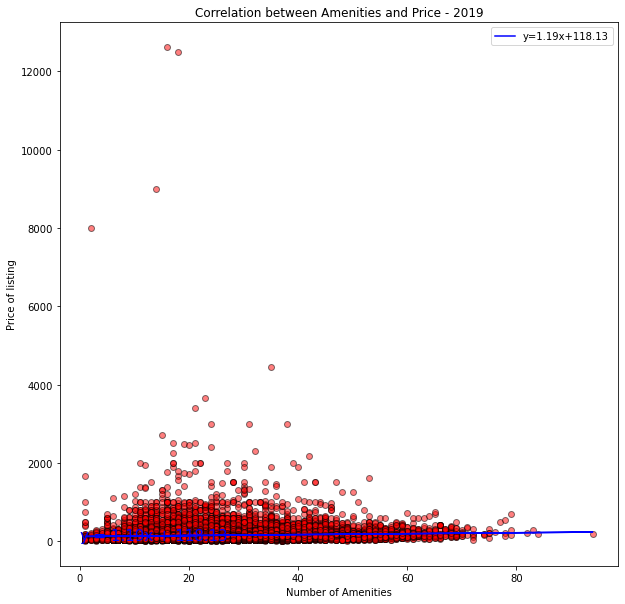

In [232]:
# Plotting amenities against price for 2019
x_axis = amenities_2019df_new['Count of Amenities']
y_axis = amenities_2019df_new['Price']
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, facecolor = 'red', edgecolor = 'black', alpha = 0.5)
plt.xlabel('Number of Amenities')
plt.ylabel('Price of listing')
plt.title('Correlation between Amenities and Price - 2019')

# Liner Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"b-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.annotate(line_eq,(0,36),fontsize=15,color="blue")
plt.legend(loc='best')
plt.savefig('Output_files_Neena/amenities_price19png')

In [227]:
# Counting number of amenities for listings in 2020 and checking if there is a correlation to reviews or price
amenities_2020df = list_2020[['id', 'amenities', 'review_scores_rating', 'price']].fillna(0)

count_amenities_2020 = []

# Counting the number of amenities 
for x in range(len(amenities_2020df)):
    tags = amenities_2020df['amenities'][x].split(',')
    number = len(tags)
    count_amenities_2020.append(number) 

amenities_2020df_new = pd.DataFrame({'id': amenities_2020df['id'], 'Amenities': amenities_2020df['amenities'], 'Count of Amenities':
                               count_amenities_2020, 'Reviews': amenities_2020df['review_scores_rating'], 'Price': amenities_2020df['price']})
amenities_2020df_new

,id,Amenities,Count of Amenities,Reviews,Price
0,9835,"[""Wifi""]",1,90.0,60.0
1,10803,"[""Coffee maker"", ""Stove"", ""TV"", ""Lock on bedro...",28,89.0,31.0
2,12936,"[""Stove"", ""TV"", ""Dishes and silverware"", ""Air ...",28,94.0,95.0
3,38271,"[""TV"", ""Free parking on premises"", ""Breakfast""...",27,97.0,99.0
4,41836,"[""Hangers"", ""Essentials"", ""Washer"", ""TV"", ""Fre...",13,94.0,40.0
...,...,...,...,...,...
20415,45003540,"[""TV"", ""Free parking on premises"", ""Breakfast""...",22,0.0,265.0
20416,45003765,"[""Air conditioning"", ""TV"", ""Kitchen"", ""Wifi"", ...",13,0.0,50.0
20417,45004813,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...",37,0.0,188.0
20418,45004915,"[""Wifi"", ""Hangers"", ""Patio or balcony"", ""Cooki...",33,0.0,24.0


1.5583648887625268 36.08656750976973 0.36575390920426526 0.0 0.027751643251178258


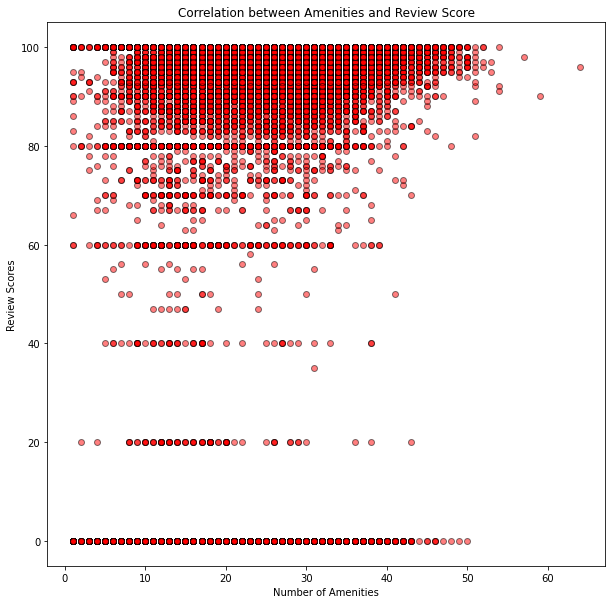

In [234]:
# Plotting amenities aginst reviews for 2019
x_axis = amenities_2020df_new['Count of Amenities']
y_axis = amenities_2020df_new['Reviews']
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, facecolor = 'red', edgecolor = 'black', alpha = 0.5)
plt.xlabel('Number of Amenities')
plt.ylabel('Review Scores')
plt.title('Correlation between Amenities and Review Score')

# Liner Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
print(slope, intercept, rvalue, pvalue, stderr)
# regress_values = x_axis * slope + intercept
# regress_values
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# line_eq
# plt.plot(x_axis,regress_values,"b-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
# plt.annotate(line_eq,(20,36),fontsize=15,color="blue")
plt.savefig('Output_files_Neena/amenities_review20.png')

1.74580527068065 111.63897234562123 0.046299321201886734 3.610231485740331e-11 0.2636019352872266


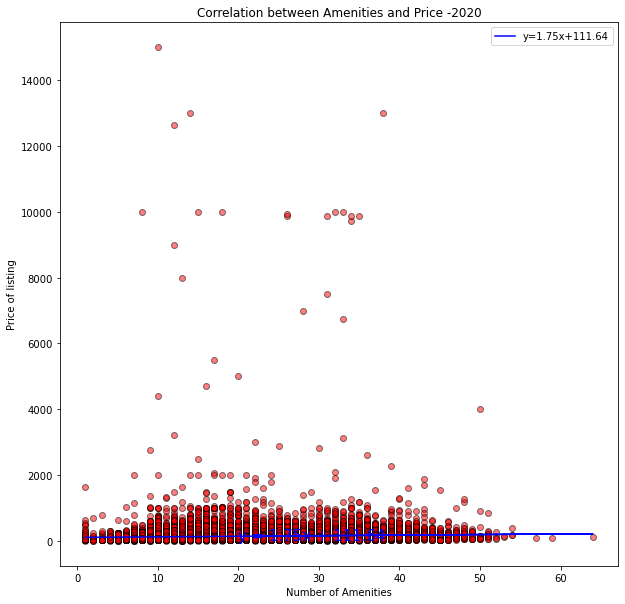

In [233]:
# Plotting amenities aginst price for 2020
x_axis = amenities_2020df_new['Count of Amenities']
y_axis = amenities_2020df_new['Price']
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, facecolor = 'red', edgecolor = 'black', alpha = 0.5)
plt.xlabel('Number of Amenities')
plt.ylabel('Price of listing')
plt.title('Correlation between Amenities and Price -2020')

# Liner Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"b-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.annotate(line_eq,(20,36),fontsize=15,color="blue")
plt.legend(loc='best')
plt.savefig('Output_files_Neena/amenities_price20.png');

### correlation between number of bedrooms and price

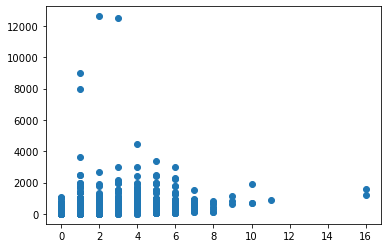

In [235]:
# Correlation of number of bedrooms, bathrooms vs price - 2019
df_bedbath_2019 = sum_list_2019[['room_type', 'bedrooms','beds','price']]
plt.scatter(df_bedbath_2019['bedrooms'], df_bedbath_2019['price'])
plt.savefig('Output_files_Neena/bedrooms_price19.png');

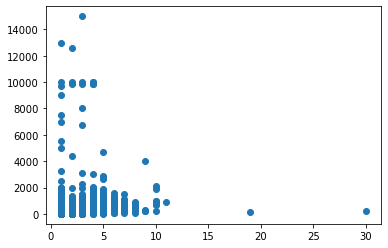

In [237]:
# Correlation of number of bedrooms, bathrooms vs price - 2020
df_bedbath_2020 = list_2020[['room_type', 'bathrooms','bathrooms_text', 'bedrooms','beds','price']]
plt.scatter(df_bedbath_2020['bedrooms'], df_bedbath_2020['price'])
plt.savefig('Output_files_Neena/bedrooms_price20.png');

## Observations

* We can see that there is an overall drop in the number of listings by almost 2000 (22895 vs 20420)

### Suburbs with top 5 price
* Entire Home - Yarra Ranges Bayside Whittlesea Cardinia Manningham - 2019
* Entire Home - Yarra Ranges, Cardinia, Bayside, Hume, Wyndham - 2020

* Private Room - Yarra Ranges, Nilumbik, Cardinia, Bayside, Melbourne - 2019
* Private Room - Yarra Ranges, Nilumbik, Bayside, Cardinia, Port Philip

* Shared Room - Hobsons Bay, Melton, Stonnington - 2019
* Shared Room - Mannigham, Cardinia, Maroondah - 2020 ( Prices have increased by a big margin and is more than that of entire homes and private rooms, Mannigham has only a single listing with price 500)

### Top 5 suburbs with each room type listing

Most listings are for entire homes, then private rooms.

* Entire Home - Melbourne, Port Philip, Stonnington, Yarra, Yarra Ranges - 2019
* Entire Home - Melbourne, Port Philip, Stonnington, Yarra, Yarra Ranges - 2020 (have reduced in 2020 but top 5 are the same)

* Private Room - Melbourne, Port Philip, Yarra, Stonnington, Moreland - 2019
* Private Room - Melbourne, Port Philip, Yarra, Stonnington, Moreland - 2020 (have reduced in 2020 but top 5 are the same)

* Shared Room - Melbourne, Whitehorse, Pot Philip - 2019
* Shared Room - Melbourne, Whitehorse, Pot Philip - 2020 (have reduced in 2020 but top 5 are the same)

* Hotel Rooms introduced in 2020